# CNN
Redes Neuronales

In [1]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directorio donde se encuentran las imágenes
data_dir = 'D:\\U\\7. Septimo\\RI\\ir24a\\week14\\caltech-101'

In [3]:
# Cargar las imágenes desde el directorio
# Es necesario cargar asi las imágenes para poder usarlas en el modelo
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


In [4]:
# Obtener el número de clases
class_names = train_dataset.class_names
num_classes = len(class_names)

In [5]:
# Preprocesar las imágenes 
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

In [6]:
# Definir el modelo
model = models.Sequential([
    # Capa de convolución
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), # 32 filtros de 3x3
    layers.MaxPooling2D((2, 2)), # Capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filtros de 3x3
    layers.MaxPooling2D((2, 2)), # Capa de pooling
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # Se usa relu porque es una red convolucional
    layers.Dense(num_classes, activation='softmax') # Se usa softamax porque es un problema de clasificación
])

In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenamiento del modelo
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluacion del modelo
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Epoch 1/10
229/229 [==============================] - 279s 1s/step - loss: 3.7894 - accuracy: 0.2546 - val_loss: 3.0598 - val_accuracy: 0.3583
Epoch 2/10
229/229 [==============================] - 329s 1s/step - loss: 2.5827 - accuracy: 0.4359 - val_loss: 2.5812 - val_accuracy: 0.4431
Epoch 3/10
229/229 [==============================] - 353s 2s/step - loss: 1.5923 - accuracy: 0.6078 - val_loss: 2.7575 - val_accuracy: 0.4426
Epoch 4/10
229/229 [==============================] - 312s 1s/step - loss: 0.7431 - accuracy: 0.8074 - val_loss: 3.2484 - val_accuracy: 0.4426
Epoch 5/10
229/229 [==============================] - 356s 2s/step - loss: 0.3263 - accuracy: 0.9198 - val_loss: 4.0033 - val_accuracy: 0.4404
Epoch 6/10
229/229 [==============================] - 345s 2s/step - loss: 0.1784 - accuracy: 0.9554 - val_loss: 4.9038 - val_accuracy: 0.4393
Epoch 7/10
229/229 [==============================] - 350s 2s/step - loss: 0.1045 - accuracy: 0.9762 - val_loss: 5.1516 - val_accuracy: 0.4551

In [9]:
# Mostrar imágenes mal clasificadas
misclassified_images = []
misclassified_labels = []
true_labels = []

In [10]:
# Iteramos sobre cada imagen y su etiqueta correspondiente en el conjunto de prueba
for image, label in test_dataset.unbatch():
    # Expandimos la dimensión de la imagen para que sea compatible con el modelo
    image = tf.expand_dims(image, axis=0) 
    prediction = model.predict(image)
    # Obtenemos la etiqueta predicha encontrando la clase con mayor probabilidad
    predicted_label = np.argmax(prediction, axis=1)[0]
    true_label = label.numpy()
    # Si la etiqueta predicha es diferente a la etiqueta verdadera, la imagen está mal clasificada
    if predicted_label != true_label:
        # Agregamos la imagen, la etiqueta predicha y la etiqueta verdadera a las listas correspondientes
        misclassified_images.append(image[0])
        misclassified_labels.append(predicted_label)
        true_labels.append(true_label)


1/1 [==============================] - 0s 44ms/step


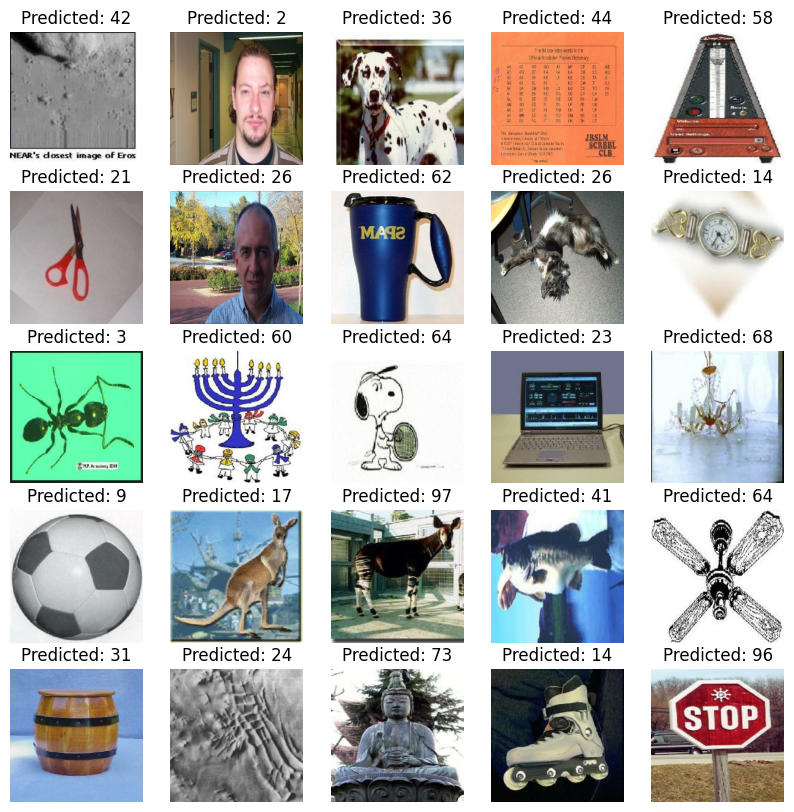

In [11]:
# Visualizar las imágenes mal clasificadas
plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

In [12]:
def mostrar_imagenes_por_categoria(categoria):
    # Busca el índice de la categoría en la lista de nombres de clases
    categoria_index = class_names.index(categoria)

    # Filtra las imágenes que pertenecen a la categoría dada
    imagenes_categoria = [
        image
        for image, label in test_dataset.unbatch()
        if label.numpy() == categoria_index
    ]

    # Si hay imágenes, muéstralas
    if imagenes_categoria:
        plt.figure(figsize=(10, 10))
        for i in range(min(25, len(imagenes_categoria))):
            plt.subplot(5, 5, i + 1)
            plt.imshow(imagenes_categoria[i])
            plt.title(f"{categoria}")
            plt.axis('off')
        plt.show()


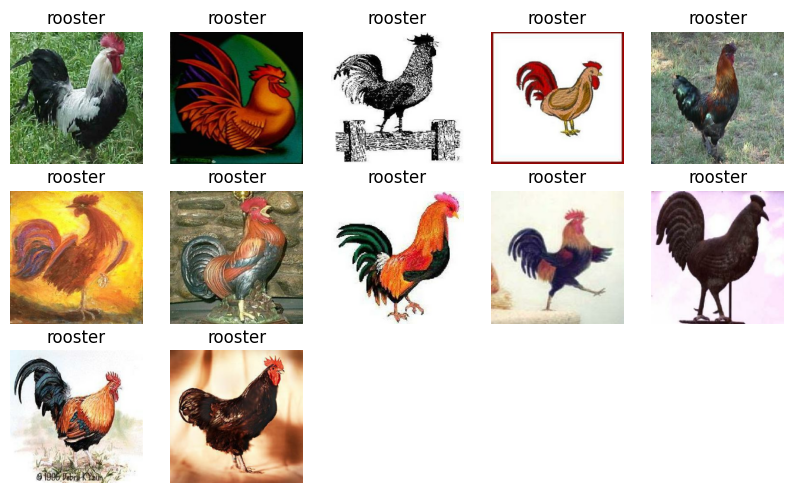

In [13]:
# Llamar a la función con el nombre de la categoría que se quiera ver 
mostrar_imagenes_por_categoria("rooster")  